In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
senate_transactions = pd.read_csv('senate_transactions.csv', parse_dates = [0])
senate_transactions.dropna(subset=['ticker'], inplace=True)
senate_transactions = senate_transactions[senate_transactions['ticker'] != '--']
senate_transactions = senate_transactions[senate_transactions['asset_type'] == 'Stock']
senate_transactions = senate_transactions[senate_transactions['type'] != 'Exchange']
senate_transactions = senate_transactions[senate_transactions['transaction_date'].dt.year == 2020]
senate_transactions.rename(columns={'ticker': 'ticker_original', 'type': 'type_detailed'}, inplace=True)
original_tickers = senate_transactions['ticker_original']
senate_transactions['ticker'] = [t.split("-")[0] if '-' in t else t for t in original_tickers]
senate_transactions['share_class'] = [t.split("-")[1] if '-' in t else None for t in original_tickers]
senate_transactions['type'] = senate_transactions.apply(lambda row: 'Purchase' if row['type_detailed'] == 'Purchase' else 'Sale', axis=1)
senate_transactions.sort_values(by=['ticker', 'transaction_date'], inplace=True)

senate_transactions

,transaction_date,owner,ticker_original,asset_description,asset_type,type_detailed,amount,comment,senator,ptr_link,ticker,share_class,type
1074,2020-04-13,Self,AA,Alcoa Corporation,Stock,Sale (Full),"$15,001 - $50,000",--,Kelly Loeffler,https://efdsearch.senate.gov/search/view/ptr/2...,AA,None,Sale
629,2020-06-04,Spouse,AAL,American Airlines Group Inc.,Stock,Purchase,"$1,001 - $15,000",sep,Pat Roberts,https://efdsearch.senate.gov/search/view/ptr/8...,AAL,None,Purchase
630,2020-06-04,Spouse,AAL,American Airlines Group Inc.,Stock,Purchase,"$1,001 - $15,000",sep,Pat Roberts,https://efdsearch.senate.gov/search/view/ptr/8...,AAL,None,Purchase
632,2020-06-30,Spouse,AAL,American Airlines Group Inc.,Stock,Purchase,"$1,001 - $15,000",R,Pat Roberts,https://efdsearch.senate.gov/search/view/ptr/8...,AAL,None,Purchase
530,2020-07-02,Spouse,AAL,American Airlines Group Inc.,Stock,Sale (Full),"$1,001 - $15,000",R,Pat Roberts,https://efdsearch.senate.gov/search/view/ptr/3...,AAL,None,Sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2020-08-18,Spouse,XOM,Exxon Mobil Corporation,Stock,Sale (Full),"$1,001 - $15,000",--,"Angus S King, Jr.",https://efdsearch.senate.gov/search/view/ptr/1...,XOM,None,Sale
452,2020-08-21,Spouse,XOM,Exxon Mobil Corporation,Stock,Sale (Full),"$15,001 - $50,000",--,Ron L Wyden,https://efdsearch.senate.gov/search/view/ptr/3...,XOM,None,Sale
151,2020-12-31,Spouse,XOM,Exxon Mobil Corporation,Stock,Sale (Full),"$1,001 - $15,000",--,Shelley M Capito,https://efdsearch.senate.gov/search/view/ptr/5...,XOM,None,Sale
342,2020-09-09,Spouse,ZM,"Zoom Video Communications, Inc.",Stock,Purchase,"$15,001 - $50,000",R,Pat Roberts,https://efdsearch.senate.gov/search/view/ptr/6...,ZM,None,Purchase


In [3]:
' '.join(senate_transactions['ticker'].unique())

'AA AAL AAPL ABBV ABT ACA ACIW ADM ADP AEP AFL AGCO AGN AIG AIV AIZ AJRD ALB ALL AMAT AMGN AMT AMWD AMZN ANTM APO ARCC ARE ARNA ATVI AVGO AXS AXTA AY AZO BA BABA BAC BAH BAM BAX BBY BERY BFAM BK BKNG BLK BLL BMEZ BMY BOIVF BP BRK BRKR BRY BSTZ BX BYND C CAG CAH CAIFX CARR CAT CB CDLX CEF CEQP CFG CGNX CL CLX CMCSA CME CONE COP COST COUP CR CRSP CRWD CSCO CTSH CTVA CTXS CVS CVX CZR DAL DCP DD DDOG DFS DG DGX DHI DHR DIS DLR DNKN DOCU DOW DPZ DRI DVN DXCM EAF EBAY EEFT EMR ENB ENTG EPD EQM ERIC ET ETY EVOP EXPI EXR F FB FDX FEYE FHB FIS FITB FNKO FOX FOXA FPL FRIAX FTNT GE GEL GILD GIS GLAD GLD GLNCY GLW GM GMAB GOLD GOOG GOOGL GPK GRUB GS HAL HASI HBI HCA HD HELE HIG HON HPQ HQL HUN IBM ICE ILMN INTC INTU IPHI IRBT IRM JCI JD JNJ JPM K KEY KEYS KHC KL KLAC KMI KNX KO KR KSS LDP LGF LGI LHX LLY LMRK LMT LNG LOW LULU LYV M MA MANT MAR MAXR MCD MDLZ MDT MET MMM MMP MO MPC MPLX MPW MRK MRVL MSFT MSM MTCH MU NFLX NKE NKLA NNVC NOC NSC NTAP NTLA NUAN NVAX NVDA NVO NWS NWSA OHI OKE ORCL ORLY O

In [4]:
senate_stocks = pd.read_csv('senate_stocks.csv', parse_dates=[1])
senate_stocks['PRC'] = senate_stocks['PRC'].abs()
senate_stocks

/home/hannahwang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (3,12,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PERMNO,date,SHRCD,SICCD,TICKER,COMNAM,SHRCLS,HSICCD,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,OPENPRC,NUMTRD,RETX
0,10104,2019-01-02,11,7372,ORCL,ORACLE CORP,NaN,7372.0,44.45000,45.34000,45.22000,14320441.0,0.00155,45.20000,45.21000,44.48000,NaN,0.00155
1,10104,2019-01-03,11,7372,ORCL,ORACLE CORP,NaN,7372.0,44.41000,45.50000,44.78000,19868713.0,-0.00973,44.78000,44.79000,44.75000,NaN,-0.00973
2,10104,2019-01-04,11,7372,ORCL,ORACLE CORP,NaN,7372.0,45.25000,46.95000,46.71000,20983953.0,0.0431,46.72000,46.73000,45.37000,NaN,0.0431
3,10104,2019-01-07,11,7372,ORCL,ORACLE CORP,NaN,7372.0,46.47000,48.10500,47.45000,17967907.0,0.015842,47.45000,47.46000,46.93000,NaN,0.015842
4,10104,2019-01-08,11,7372,ORCL,ORACLE CORP,NaN,7372.0,47.20000,48.36000,47.88000,16255688.0,0.009062,47.88000,47.89000,47.93000,NaN,0.009062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172531,93436,2020-12-24,11,9999,TSLA,TESLA INC,NaN,9999.0,641.00000,666.09003,661.77002,22813214.0,0.024444,661.62000,661.78003,642.98999,465870.0,0.024444
172532,93436,2020-12-28,11,9999,TSLA,TESLA INC,NaN,9999.0,660.79999,681.40002,663.69000,32232732.0,0.002901,663.59998,663.77002,674.51001,631681.0,0.002901
172533,93436,2020-12-29,11,9999,TSLA,TESLA INC,NaN,9999.0,655.00000,669.90002,665.98999,22867542.0,0.003465,665.82001,665.97998,661.00000,466884.0,0.003465
172534,93436,2020-12-30,11,9999,TSLA,TESLA INC,NaN,9999.0,668.36029,696.59998,694.78003,42766263.0,0.043229,694.64001,694.78003,672.00000,767565.0,0.043229


In [5]:
senate_transactions = senate_transactions[senate_transactions['ticker'].isin(senate_stocks['TICKER'].unique())]

In [6]:
# index = pd.read_csv('RUSSEL_3000_2020.csv', parse_dates=[0], index_col=0, thousands=r',')
index = pd.read_csv('sp500.csv', parse_dates=[0], index_col=0)
index

,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
2019-12-02,-0.008588,-0.008620,-0.008306,-0.008362,26829950300,505,27063281400,505,3113.87,-0.008631
2019-12-03,-0.006563,-0.006595,-0.008242,-0.008301,26653014700,505,26829950300,505,3093.20,-0.006638
2019-12-04,0.006336,0.006233,0.007800,0.007729,26819640300,505,26653014700,505,3112.76,0.006324
2019-12-05,0.001732,0.001427,0.001703,0.001449,26870497000,505,26823599100,505,3117.43,0.001500
2019-12-06,0.009108,0.009062,0.009213,0.009175,27113952600,505,26870497000,505,3145.91,0.009136
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.003623,0.003520,0.002365,0.002262,32690302800,505,32575644000,505,3703.06,0.003537
2020-12-28,0.008938,0.008938,0.002918,0.002918,32982474500,505,32690302800,505,3735.36,0.008723
2020-12-29,-0.002240,-0.002240,-0.004992,-0.004992,32908586800,505,32982474500,505,3727.04,-0.002227
2020-12-30,0.001475,0.001364,0.006731,0.006487,32953469800,505,32908586800,505,3732.04,0.001342


In [7]:
senate = senate_transactions.copy()
senate.drop(columns=['ticker_original', 'asset_type', 'comment', 'ptr_link'], inplace=True)

In [8]:
set(senate.amount)

{'$1,000,001 - $5,000,000',
 '$1,001 - $15,000',
 '$100,001 - $250,000',
 '$15,001 - $50,000',
 '$250,001 - $500,000',
 '$5,000,001 - $25,000,000',
 '$50,001 - $100,000'}

In [9]:
amount_map = {
    '$1,001 - $15,000':1,
    '$15,001 - $50,000':2,
    '$50,001 - $100,000':3,
    '$100,001 - $250,000':4,
    '$250,001 - $500,000':5,
    '$1,000,001 - $5,000,000':6,
    '$5,000,001 - $25,000,000':7,
}
senate['amount_discrete'] = senate['amount'].apply(lambda a: amount_map[a])

In [10]:
market_cap = pd.read_csv('MarketCap_Dec31_2020.csv')[['ticker', 'Market Cap']].rename(columns = {'Market Cap':'market_cap'})
market_cap['market_cap'] = 1000 * market_cap['market_cap']
senate = senate.merge(market_cap, on='ticker')

In [11]:
times = {'1d':1, '5d':5, '1m':22, 'prev1d':-1, 'prev5d':-5, 'prev1m':-22}

daily_returns = pd.DataFrame(columns=list(range(-21,23))+['type'])

prev_ticker = None
prev_stock_prices = None

for i, tr in senate.iterrows():
    stock_prices = prev_stock_prices
    if tr['ticker'] != prev_ticker:
        stock_prices = senate_stocks[senate_stocks['TICKER'] == tr['ticker']]
        if tr['share_class']:
            stock_prices = stock_prices[stock_prices['SHRCLS'] == tr['share_class']]
        stock_prices['daily_return'] = stock_prices['PRC'].pct_change()
        prev_ticker = tr['ticker']
        prev_stock_prices = stock_prices
        
    stock_transaction = stock_prices[stock_prices['date'] == tr['transaction_date']]
    if len(stock_transaction) != 1:
        continue
    idx = stock_transaction.index[0]
    index_idx = index.index.get_loc(tr['transaction_date'])
    
    stock_daily_returns = stock_prices.loc[idx+times['prev1m']+1:idx+times['1m']]['daily_return']
    index_daily_returns = index.iloc[index_idx+times['prev1m']+1:index_idx+times['1m']+1]['sprtrn']
    if len(stock_daily_returns) == 44 and len(index_daily_returns) == 44:
        daily_returns.loc[i] = list(stock_daily_returns.to_numpy() - index_daily_returns.to_numpy()) + [tr['type']]    
    
    for time in times:
        multiplier = (1 if tr['type'] == 'Purchase' else -1) * (1 if times[time] > 0 else -1)
        try:
            senate.loc[i, 'return_{}'.format(time)] = (stock_prices.loc[idx+times[time]]['PRC'] / stock_prices.loc[idx]['PRC'] - 1) * multiplier
            senate.loc[i, 'return_index_{}'.format(time)] = (index.iloc[index_idx+times[time]]['spindx'] / index.iloc[index_idx]['spindx'] - 1) * multiplier
            senate.loc[i, 'return_abnormal_{}'.format(time)] = senate.loc[i, 'return_{}'.format(time)] - senate.loc[i, 'return_index_{}'.format(time)]
        except:
            pass

<ipython-input-11-43d56d23a610>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_prices['daily_return'] = stock_prices['PRC'].pct_change()


In [12]:
daily_returns

,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,...,14,15,16,17,18,19,20,21,22,type
0,-0.088583,-0.027625,-0.027659,-0.033562,-0.126740,0.009205,-0.016674,0.063966,0.188359,-0.036294,...,-0.028383,0.010054,-0.007759,-0.005825,-0.040039,0.060565,-0.037352,-0.041232,-0.025061,Sale
1,-0.040609,-0.020361,0.019846,0.046021,-0.004122,-0.024010,-0.038496,-0.007134,-0.015948,0.060313,...,-0.042716,-0.000990,-0.035758,0.061243,-0.034179,-0.024915,-0.028741,0.008118,-0.058712,Purchase
2,-0.040609,-0.020361,0.019846,0.046021,-0.004122,-0.024010,-0.038496,-0.007134,-0.015948,0.060313,...,-0.042716,-0.000990,-0.035758,0.061243,-0.034179,-0.024915,-0.028741,0.008118,-0.058712,Purchase
3,0.054344,0.001690,0.042501,0.414339,0.085630,0.080481,-0.078858,-0.077167,-0.096168,0.151056,...,-0.001679,-0.015337,0.048412,-0.026095,-0.007395,0.039836,-0.043864,-0.015548,-0.013037,Purchase
4,0.042501,0.414339,0.085630,0.080481,-0.078858,-0.077167,-0.096168,0.151056,-0.010701,0.000798,...,0.048412,-0.026095,-0.007395,0.039836,-0.043864,-0.015548,-0.013037,-0.010778,0.031587,Sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,-0.067589,0.024615,0.007311,-0.048413,0.034845,-0.005725,-0.010107,0.033040,0.040666,-0.021384,...,0.036084,-0.010155,-0.011758,-0.005822,0.026980,-0.009705,-0.014874,-0.032174,-0.002701,Sale
1185,-0.067589,0.024615,0.007311,-0.048413,0.034845,-0.005725,-0.010107,0.033040,0.040666,-0.021384,...,0.036084,-0.010155,-0.011758,-0.005822,0.026980,-0.009705,-0.014874,-0.032174,-0.002701,Sale
1186,-0.031845,0.048909,-0.029039,0.014384,0.000012,0.007341,-0.005326,-0.001406,-0.045307,-0.002654,...,0.004726,-0.026169,-0.007448,-0.003236,-0.019246,-0.015857,0.047078,0.008148,-0.004955,Sale
1187,0.014384,0.000012,0.007341,-0.005326,-0.001406,-0.045307,-0.002654,-0.003141,0.025264,0.002312,...,-0.003236,-0.019246,-0.015857,0.047078,0.008148,-0.004955,-0.008865,-0.035223,-0.008365,Sale


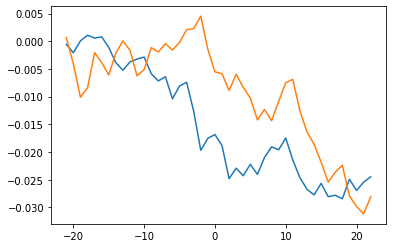

In [13]:
def graph(tr_type):
    daily = daily_returns[daily_returns['type'] == tr_type]
    daily = daily.drop(columns=['type'])
    cumulative = daily + 1
    cumulative = cumulative.cumprod(axis=1)
    return cumulative.mean() - 1

plt.plot(graph('Purchase'))
plt.plot(graph('Sale'))

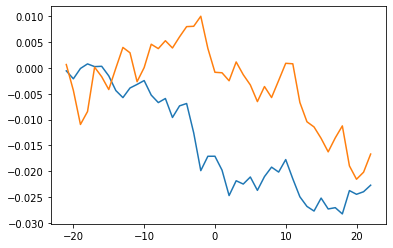

In [14]:
def graph2(tr_type):
    daily = daily_returns[daily_returns['type'] == tr_type]
    daily = daily.drop(columns=['type'])
    daily = daily.mean()
    cumulative = (daily + 1).cumprod()
    return cumulative - 1

plt.plot(graph2('Purchase'))
plt.plot(graph2('Sale'))

In [15]:
senators = pd.read_excel('senate_members.xlsx', index_col=0)
senators['age'] = 2020 - senators['Born'].dt.year
senators['in_office'] = 2020 - senators['Assumed office'].dt.year
senators.drop(columns=['Unnamed: 6'], inplace=True)
senators

,Senator,Party,Born,Occupation(s),Assumed office,age,in_office
Name,,,,,,,
Dianne Feinstein,Dianne Feinstein,Democratic,1933-06-22,"Non-profit organization fellow; Member, Califo...",1992-11-10,87,28
Chuck Grassley,Chuck Grassley,Republican,1933-09-17,Farmer; College professor,1981-01-03,87,39
Richard Shelby,Richard Shelby,Republican,1934-05-06,Lawyer,1987-01-03,86,33
James M Inhofe,Jim Inhofe,Republican,1934-11-17,"Specialist Fourth Class, U.S. Army; Businessma...",1994-11-16,86,26
Patrick Leahy,Patrick Leahy,Democratic,1940-03-31,Lawyer,1975-01-03,80,45
...,...,...,...,...,...,...,...
Josh Hawley,Josh Hawley,Republican,1979-12-31,Lawyer; Professor,2019-01-03,41,1
Jon Ossoff,Jon Ossoff,Democratic,1987-02-16,Investigative journalist; Documentary film pro...,2021-01-20,33,-1
"David A Perdue , Jr",David Perdue,Republican,1949-12-10,Corporate executive,2015-03-01,71,5


In [16]:
committees = pd.read_excel('senate_committees.xlsx', header=1,usecols=[1,2,3])
committees['Committee'] = committees['Committee'].apply(lambda s: s.replace(' ', '_').replace(',', '').replace("'", ''))
committees

,Name,Committee,Committee #
0,Alex Padilla,Budget,117
1,Alex Padilla,Environment_and_Public_Works,117
2,Alex Padilla,Homeland_Security_and_Governmental_Affairs,117
3,Alex Padilla,Judiciary,117
4,Alex Padilla,Rules_and_Administration,117
...,...,...,...
706,Tom Udall,Rules_and_Administration,116
707,Tommy Tuberville,Agriculture_Nutrition_and_Forestry,117
708,Tommy Tuberville,Armed_Services,117
709,Tommy Tuberville,Health_Education_Labor_and_Pensions,117


In [17]:
for com in committees['Committee'].unique():
    senators[com] = 0

for i, row in senators.iterrows():
    for com in committees[committees['Name'] == row['Senator']]['Committee']:
        senators.loc[i, com] = 1

senators

,Senator,Party,Born,Occupation(s),Assumed office,age,in_office,Budget,Environment_and_Public_Works,Homeland_Security_and_Governmental_Affairs,...,Commerce_Science_and_Transportation,Armed_Services,Energy_and_Natural_Resources,Finance,Foreign_Relations,Small_Business_and_Entrepreneurship,Health_Education_Labor_and_Pensions,Banking_Housing_and_Urban_Affairs,Veterans_Affairs,Appropriations
Name,,,,,,,,,,,,,,,,,,,,,
Dianne Feinstein,Dianne Feinstein,Democratic,1933-06-22,"Non-profit organization fellow; Member, Califo...",1992-11-10,87,28,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Chuck Grassley,Chuck Grassley,Republican,1933-09-17,Farmer; College professor,1981-01-03,87,39,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Richard Shelby,Richard Shelby,Republican,1934-05-06,Lawyer,1987-01-03,86,33,0,1,0,...,0,0,0,0,0,0,0,1,0,1
James M Inhofe,Jim Inhofe,Republican,1934-11-17,"Specialist Fourth Class, U.S. Army; Businessma...",1994-11-16,86,26,0,1,0,...,0,1,0,0,0,1,0,0,0,0
Patrick Leahy,Patrick Leahy,Democratic,1940-03-31,Lawyer,1975-01-03,80,45,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Josh Hawley,Josh Hawley,Republican,1979-12-31,Lawyer; Professor,2019-01-03,41,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
Jon Ossoff,Jon Ossoff,Democratic,1987-02-16,Investigative journalist; Documentary film pro...,2021-01-20,33,-1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
"David A Perdue , Jr",David Perdue,Republican,1949-12-10,Corporate executive,2015-03-01,71,5,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [18]:
senate_returns = senate.join(senators, on='senator')
senate_returns.reset_index(drop = True, inplace = True)

In [19]:
senate_returns.to_csv(path_or_buf='senate_returns.csv', index = False)